## 1.Exploring the Dataset<a href="#1.Exploring-the-Dataset" class="anchor-link">¶</a>

In \[40\]:

    import numpy as np
    import pandas as pd
    import warnings

    # Shutting down the warnings
    def warn(*args, **kwargs):
        pass
    warnings.warn = warn

In \[41\]:

    # Reading the dataset
    df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

    df.head()

Out\[41\]:

|     | v1   | v2                                                | Unnamed: 2 | Unnamed: 3 | Unnamed: 4 |
|-----|------|---------------------------------------------------|------------|------------|------------|
| 0   | ham  | Go until jurong point, crazy.. Available only ... | NaN        | NaN        | NaN        |
| 1   | ham  | Ok lar... Joking wif u oni...                     | NaN        | NaN        | NaN        |
| 2   | spam | Free entry in 2 a wkly comp to win FA Cup fina... | NaN        | NaN        | NaN        |
| 3   | ham  | U dun say so early hor... U c already then say... | NaN        | NaN        | NaN        |
| 4   | ham  | Nah I don't think he goes to usf, he lives aro... | NaN        | NaN        | NaN        |

In \[42\]:

    len(df)

Out\[42\]:

    5572

In \[43\]:

    # Check for null values
    df.isna().sum()

Out\[43\]:

    v1               0
    v2               0
    Unnamed: 2    5522
    Unnamed: 3    5560
    Unnamed: 4    5566
    dtype: int64

In \[44\]:

    # Dropping unnamed columns
    df = df[['v1', 'v2']]

    df.head()

Out\[44\]:

|     | v1   | v2                                                |
|-----|------|---------------------------------------------------|
| 0   | ham  | Go until jurong point, crazy.. Available only ... |
| 1   | ham  | Ok lar... Joking wif u oni...                     |
| 2   | spam | Free entry in 2 a wkly comp to win FA Cup fina... |
| 3   | ham  | U dun say so early hor... U c already then say... |
| 4   | ham  | Nah I don't think he goes to usf, he lives aro... |

In \[45\]:

    # Check for empty space strings
    blanks = []

    for i, v1, v2 in df.itertuples():
        if type(v2) == str and v2.isspace():
            blanks.append(i)
            
    if len(blanks) > 0:
        print(f'There are len(blanks) empty space strings in the dataset')
        df.drop(blanks, inplace=True)

In \[46\]:

    # Check for number of unique values
    df.nunique()

Out\[46\]:

    v1       2
    v2    5169
    dtype: int64

In \[47\]:

    # Checking for balancement
    df['v1'].value_counts()

Out\[47\]:

    v1
    ham     4825
    spam     747
    Name: count, dtype: int64

## 2.Statistical Analysis<a href="#2.Statistical-Analysis" class="anchor-link">¶</a>

In \[48\]:

    # Implementing the T-Test
    from scipy import stats

    df['v2_length'] = df['v2'].apply(len)

    hams = df[df['v1'] == 'ham']['v2_length']
    spams = df[df['v1'] == 'spam']['v2_length']

    t_stat, p_value = stats.ttest_ind(hams, spams)

    alpha = 0.05

    if p_value < alpha:
        print('The difference in sms lengths are significance')
    else:
        print('The difference in sms lengths are not significance')

    print(f'T-Stat: {t_stat}')
    print(f'P-Value: {p_value}')

    The difference in sms lengths are significance
    T-Stat: -31.350650338992136
    P-Value: 7.702078585492358e-199

## 3.Preprocessing<a href="#3.Preprocessing" class="anchor-link">¶</a>

In \[49\]:

    # Separating X and y
    X = df['v2']
    y = df['v1']

    display(X, y)

    0       Go until jurong point, crazy.. Available only ...
    1                           Ok lar... Joking wif u oni...
    2       Free entry in 2 a wkly comp to win FA Cup fina...
    3       U dun say so early hor... U c already then say...
    4       Nah I don't think he goes to usf, he lives aro...
                                  ...                        
    5567    This is the 2nd time we have tried 2 contact u...
    5568                Will Ì_ b going to esplanade fr home?
    5569    Pity, * was in mood for that. So...any other s...
    5570    The guy did some bitching but I acted like i'd...
    5571                           Rofl. Its true to its name
    Name: v2, Length: 5572, dtype: object

    0        ham
    1        ham
    2       spam
    3        ham
    4        ham
            ... 
    5567    spam
    5568     ham
    5569     ham
    5570     ham
    5571     ham
    Name: v1, Length: 5572, dtype: object

In \[50\]:

    # Encoding the Labels
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    y = le.fit_transform(y)

    display(y)

    array([0, 0, 1, ..., 0, 0, 0])

In \[51\]:

    # Train and Test Split
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 4.Training the Dataset<a href="#4.Training-the-Dataset" class="anchor-link">¶</a>

In \[52\]:

    # Import basic libraries
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.svm import LinearSVC

In \[53\]:

    # Creating the SVM Pipeline
    from sklearn.model_selection import GridSearchCV

    pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

    grid_params_svm = {
        'tfidf__ngram_range': [(1,1), (1,2)],
        'tfidf__stop_words': [None, 'english'],
        'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0],
    }

    model_svm = GridSearchCV(pipeline, grid_params_svm, cv=5, scoring='accuracy')

    model_svm.fit(X_train, y_train)

Out\[53\]:

    GridSearchCV(cv=5,
                 estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                           ('classifier', LinearSVC())]),
                 param_grid={'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5,
                                               5.0, 10.0],
                             'tfidf__ngram_range': [(1, 1), (1, 2)],
                             'tfidf__stop_words': [None, 'english']},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5,
                 estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                           ('classifier', LinearSVC())]),
                 param_grid={'classifier__C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5,
                                               5.0, 10.0],
                             'tfidf__ngram_range': [(1, 1), (1, 2)],
                             'tfidf__stop_words': [None, 'english']},
                 scoring='accuracy')

estimator: Pipeline

    Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

TfidfVectorizer

    TfidfVectorizer()

LinearSVC

    LinearSVC()

In \[54\]:

    # Creating the NB pipeline
    from sklearn.naive_bayes import MultinomialNB

    pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

    grid_params_nb = {
        'tfidf__ngram_range': [(1,1), (1,2)],
        'tfidf__stop_words': [None, 'english'],
        'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
    }

    model_nb = GridSearchCV(pipeline, grid_params_nb, cv=5, scoring='accuracy')

    model_nb.fit(X_train, y_train)

Out\[54\]:

    GridSearchCV(cv=5,
                 estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                           ('classifier', MultinomialNB())]),
                 param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                                   2.5, 5.0, 10.0],
                             'tfidf__ngram_range': [(1, 1), (1, 2)],
                             'tfidf__stop_words': [None, 'english']},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5,
                 estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                           ('classifier', MultinomialNB())]),
                 param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                                   2.5, 5.0, 10.0],
                             'tfidf__ngram_range': [(1, 1), (1, 2)],
                             'tfidf__stop_words': [None, 'english']},
                 scoring='accuracy')

estimator: Pipeline

    Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

TfidfVectorizer

    TfidfVectorizer()

MultinomialNB

    MultinomialNB()

## 5.Metrics<a href="#5.Metrics" class="anchor-link">¶</a>

In \[55\]:

    # Create a function to perform classification metrics
    def show_metrics(y_true, y_pred, grid_search=None):
        from sklearn.metrics import (classification_report,
                                     confusion_matrix,
                                     ConfusionMatrixDisplay)
        
        print('-' * 20)
        print(classification_report(y_true, y_pred))
        print(confusion_matrix(y_true, y_pred))
        
        if grid_search:
            print('-' * 20)
            print(grid_search.best_params_)

In \[56\]:

    # SVM metrics
    best_svm = model_svm.best_estimator_
    y_pred_svm = best_svm.predict(X_test)

    show_metrics(y_test, y_pred_svm, model_svm)

    --------------------
                  precision    recall  f1-score   support

               0       0.99      1.00      0.99      1464
               1       0.97      0.93      0.95       208

        accuracy                           0.99      1672
       macro avg       0.98      0.96      0.97      1672
    weighted avg       0.99      0.99      0.99      1672

    [[1458    6]
     [  14  194]]
    --------------------
    {'classifier__C': 10.0, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

In \[57\]:

    # NB metrics
    best_nb = model_nb.best_estimator_
    y_pred_nb = best_nb.predict(X_test)

    show_metrics(y_test, y_pred_nb, model_nb)

    --------------------
                  precision    recall  f1-score   support

               0       0.99      0.99      0.99      1464
               1       0.96      0.92      0.94       208

        accuracy                           0.99      1672
       macro avg       0.97      0.96      0.97      1672
    weighted avg       0.99      0.99      0.99      1672

    [[1456    8]
     [  16  192]]
    --------------------
    {'classifier__alpha': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

## 6.Save the ML Model<a href="#6.Save-the-ML-Model" class="anchor-link">¶</a>

In \[58\]:

    def save_model(model, prefix=''):
        import joblib
        from datetime import datetime

        # Get the current date and time as a string to define the file name
        current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        filename = f"{prefix}model_{current_datetime}.joblib"

        joblib.dump(model, filename)

        print(f"Model saved to {filename}")

In \[59\]:

    save_model(model_svm, prefix='svm_')
    save_model(model_nb, prefix='nb_')

    Model saved to svm_model_2023-09-26_14-47-58.joblib
    Model saved to nb_model_2023-09-26_14-47-59.joblib

## 7.Visualizing<a href="#7.Visualizing" class="anchor-link">¶</a>

In \[60\]:

    !pip install wordcloud

    Requirement already satisfied: wordcloud in /opt/conda/lib/python3.10/site-packages (1.9.2)
    Requirement already satisfied: numpy>=1.6.1 in /opt/conda/lib/python3.10/site-packages (from wordcloud) (1.23.5)
    Requirement already satisfied: pillow in /opt/conda/lib/python3.10/site-packages (from wordcloud) (9.5.0)
    Requirement already satisfied: matplotlib in /opt/conda/lib/python3.10/site-packages (from wordcloud) (3.7.2)
    Requirement already satisfied: contourpy>=1.0.1 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (1.1.0)
    Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (0.11.0)
    Requirement already satisfied: fonttools>=4.22.0 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (4.40.0)
    Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (1.4.4)
    Requirement already satisfied: packaging>=20.0 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (21.3)
    Requirement already satisfied: pyparsing<3.1,>=2.3.1 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (3.0.9)
    Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.10/site-packages (from matplotlib->wordcloud) (2.8.2)
    Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.10/site-packages (from python-dateutil>=2.7->matplotlib->wordcloud) (1.16.0)

In \[61\]:

    import matplotlib.pyplot as plt
    from wordcloud import WordCloud

    # Combine the predicted labels (0 for ham, 1 for spam) with the test messages
    df_results = pd.DataFrame({'message': X_test, 'label': y_pred_svm})

    # Filter out the spam messages
    spam_messages = df_results[df_results['label'] == 1]['message']

    # Join the spam messages into a single text
    spam_text = " ".join(spam_messages)

    # Generate a word cloud for spam messages
    wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(spam_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud for Spam Messages")
    plt.show()

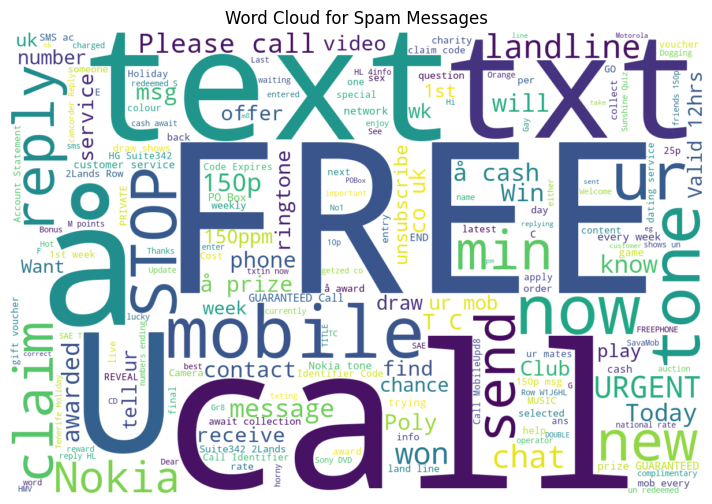